<a href="https://colab.research.google.com/github/7430souvik/souvik/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
pip install --upgrade tensorflow


In [22]:
pip show tensorflow


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [23]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-08-24 05:00:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.207, 64.233.181.207, 173.194.193.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   158MB/s    in 0.7s    

2024-08-24 05:00:25 (158 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [24]:
! ls pizza_steak


test  train


In [25]:
! ls pizza_steak/train

pizza  steak


In [26]:
! ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [27]:
import os

# walk through pizza_steak directory and list of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [28]:
! ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Aug 24 04:43 .
drwxr-xr-x 1 root root 4096 Aug 24 05:00 ..
drwxr-xr-x 4 root root 4096 Aug 24 04:43 test
drwxr-xr-x 4 root root 4096 Aug 24 04:43 train


In [29]:
# get the class names programatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['pizza' 'steak']


In [30]:
# visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # setup target directory
    target_folder = target_dir + target_class

    # get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

['564530.jpg']
Image shape: (512, 512, 3)


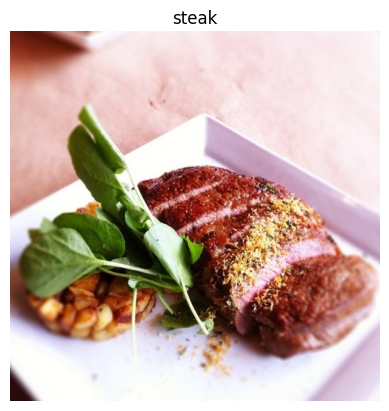

In [31]:
# view random_image from the training dataset

img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [32]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[103,  31,  19],
        [103,  31,  19],
        [103,  31,  19],
        ...,
        [240, 236, 237],
        [234, 230, 231],
        [230, 226, 227]],

       [[104,  32,  20],
        [104,  32,  20],
        [103,  31,  19],
        ...,
        [244, 240, 241],
        [239, 235, 236],
        [236, 232, 233]],

       [[105,  31,  18],
        [105,  31,  18],
        [105,  31,  18],
        ...,
        [248, 244, 245],
        [245, 241, 242],
        [242, 238, 239]],

       ...,

       [[ 44,  13,   8],
        [ 44,  13,   8],
        [ 44,  13,   8],
        ...,
        [250, 244, 246],
        [251, 242, 245],
        [250, 241, 244]],

       [[ 44,  14,   6],
        [ 44,  14,   6],
        [ 44,  13,   8],
        ...,
        [251, 242, 245],
        [250, 241, 246],
        [250, 241, 246]],

       [[ 45,  15,   7],
        [ 44,  14,   6],
        [ 44,  13,   8],
        ...,
        [251, 242, 24

In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# set the seed
tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# set paths to our dirextories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

## data augmentation
# create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
# create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

# import data and augment it from training directory

print("augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   batch_size=32,
                                                                   target_size=(224, 224),
                                                                   class_mode="binary",
                                                                   shuffle=True)


# create non augmented training data batches
print("non-augmented training data:")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               shuffle=True)


# create non aumented test data batches
print("non-augmented test data:")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              shuffle=True)




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
augmented training data:
Found 1500 images belonging to 2 classes.
non-augmented training data:
Found 1500 images belonging to 2 classes.
non-augmented test data:
Found 500 images belonging to 2 classes.


In [46]:
# get sample data batches
images, labels = train_data_augmented.__next__()
augmented_images, augmented_labels= train_data_augmented.__next__()

showing image number: 31


(-0.5, 223.5, 223.5, -0.5)

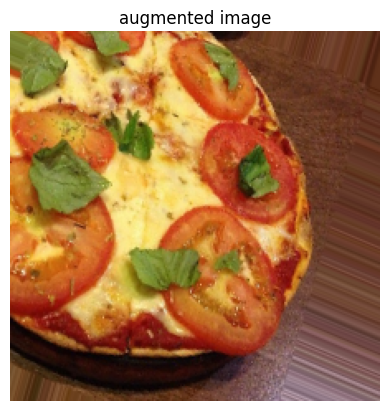

In [51]:
# show augmented images
import random
random_number = random.randint(0, 32)
print(f"showing image number: {random_number}")
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

In [50]:




# to make the creating our model little eaiser
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

# builing a cnn model
model_1 = Sequential([
    Conv2D(10,3, activation="relu"),
    MaxPool2D(pool_size= 2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# compile our CNN

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# fit the model
history=model_1.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=1500//32,
            validation_data=test_data,
            validation_steps=500//32)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5454 - loss: 0.6918 - val_accuracy: 0.6854 - val_loss: 0.6336
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5938 - loss: 0.6442 - val_accuracy: 0.8500 - val_loss: 0.6149
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6543 - loss: 0.6280 - val_accuracy: 0.8188 - val_loss: 0.4462
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8438 - loss: 0.4530 - val_accuracy: 0.8500 - val_loss: 0.4232
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.7627 - loss: 0.4915 - val_accuracy: 0.8292 - val_loss: 0.3846


In [52]:
# lets plot the training curves

import pandas as pd



# plot validation training curves separately

def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics.
  """

  loss= history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  # plot accuracy

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

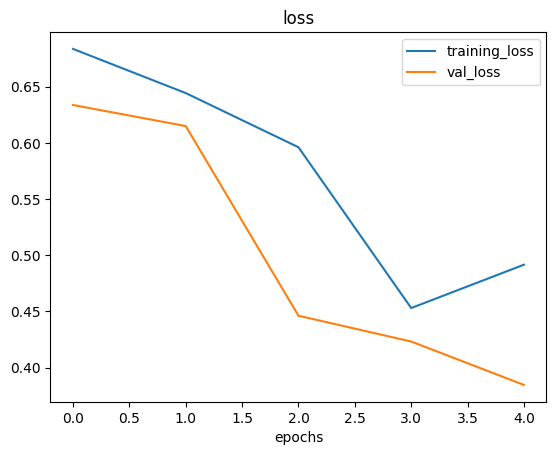

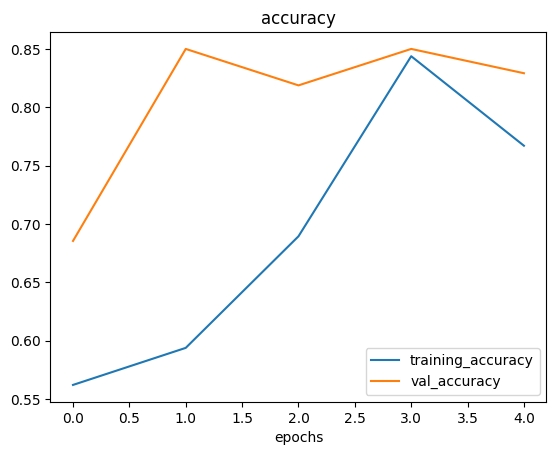

In [53]:
# check out the loss and accuracy of model_1

plot_loss_curves(history)

In [54]:


# classes we are working with

print (class_names)

['pizza' 'steak']


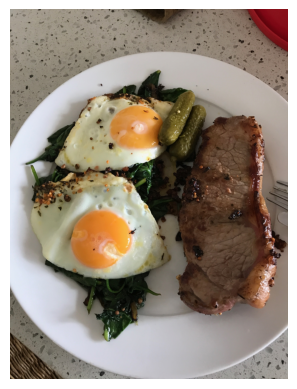

In [73]:
# making prediction with our own custom data

# view our example image

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#! wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
steak= mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [76]:
# create a function to import an image and resize it to be able to used with our model

def load_and_prep_image(filename, img_shape=224):
  """
  reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """
  # read in the image
  img = tf.io.read_file(filename)

  # decode the read file into a tensor
  img = tf.image.decode_image(img)

  # resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [77]:
# load and preprocess our custom images

steak= load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [78]:
pred= model_1.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


array([[0.95190597]], dtype=float32)

In [79]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [82]:
def pred_and_plot(model, filename, class_names=class_names ):
  """
  imports an image located at filename, make a prediction with model and plots the image with the predicted class as the title.
  """

  # import the target image and preprocess it

  img = load_and_prep_image(filename)

  # make a prrediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # get the predicted class

  pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


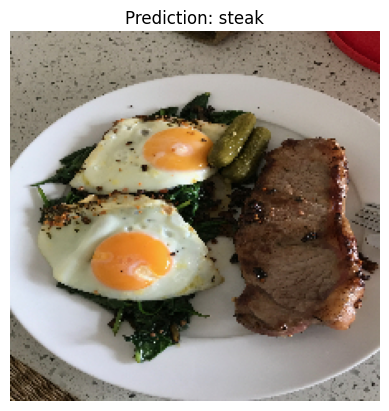

In [83]:
# test our model on custom image

pred_and_plot(model_1, filename="03-steak.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


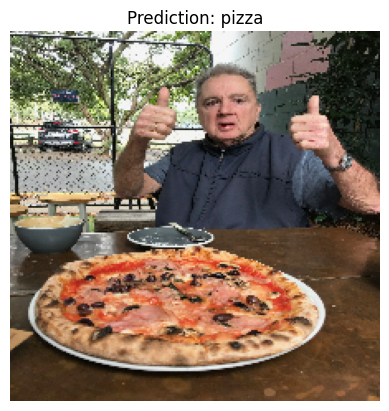

In [84]:
pred_and_plot(model_1, filename= "03-pizza-dad.jpeg")